#  Heart Disease Prediction Using KNN Algorithm

- Data pre process
- Training model using KNN algorithm
- confusion matrix,Classification report,ROC AUC
- Hyperparameter Tuning using GridsearchCV
- Comparison of accuracy
- Data set source: https://archive.ics.uci.edu/ml/datasets/heart+disease

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import tree
# from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

from sklearn.model_selection import GridSearchCV

**source:** UCI repository https://archive.ics.uci.edu/ml/datasets/heart+disease

### Data read

In [2]:
# df=pd.read_csv('heart disease.csv',header=None) #header none is required
# display(df.head()) 
# df.shape

In [3]:
df=pd.read_csv('processed.cleveland.data',header=None) #header none is required
display(df.head()) 
df.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(303, 14)

### Add column names

In [4]:
df.columns=['age','sex','cp','restbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Explanation:** Here, hd means heart disease,our target feature.

#### Target Variable: hd

In [5]:
print(df['hd'].value_counts())  

0    164
1     55
2     36
3     35
4     13
Name: hd, dtype: int64


In [6]:
df[df['hd'] > 1] = 1

print(df['hd'].value_counts())

0    164
1    139
Name: hd, dtype: int64


**Explanation:** 
- Here 0 is no heart disease, 1,2,3,4 are different types of heart diseases.
- for classification, these 4 values need to be converted to 2 values,<b>0 means no diease</b>,<b>1 means heart disease</b>(any type among 1,2,3,4).
- At last we have 164 patients with no Heart disease and 139 patients with Heart disease.

In [7]:
#print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Explanation:** As **'ca'** and **'thal'**  are object type, they need to be checked for unique values whethere they have any non-numeric value

### Unique values check

In [8]:
#df.isnull().sum()

In [9]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' 1 '2.0' '1.0' '3.0' '?']
['6.0' 1 '7.0' '3.0' '?']


**Explanation:** Mixture of numeric and text data, these rows need to be removed

### Unique values check for Each Column

In [10]:
# # check unique values in each column
# for column in df:
#     print(df[column].unique())    

### Find rows with null values

In [11]:
display(df.loc[(df['ca']=='?') | (df['thal']=='?')])
print('number of rows with null values:',len(df.loc[(df['ca']=='?') | (df['thal']=='?')]))

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


number of rows with null values: 5


**Explanation:** As only 6 rows contain null values compared to total 303 rows, these 6 rows can be removed .

### Remove null or non numeric values

In [12]:
df=df.loc[(df['ca']!='?') & (df['thal']!='?')]
len(df) #303-6=297 rows remaining 

298

In [13]:
#Recheck to confirm
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' 1 '2.0' '1.0' '3.0']
['6.0' 1 '7.0' '3.0']


### Variable Separation
X= feature Variable, y=Target Variable

In [14]:
X=df.drop('hd',axis=1)
display(X.head(3))
print(X.shape)

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0


(298, 13)


In [15]:
y=df['hd']
y.head()
print(y.shape)

(298,)


### Encoding-One Hot

#### For Feature Variable

In [16]:
X.columns

Index(['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

**Explanation:**
- Total categorical features are 7: sex[1,0],  cp[1,2,3,4],  fbs[0,1],  restecg[1,2,3],  extang[0,1],  slope[1,2,3],  thal[3,6,9]
- **cp,  restecg,  slope, thal** has more than 2 values,so these 4 need to be encoded and all the other category features contain only 2 values 0 and 1, so no encoding is needed.

In [17]:
# X['cp'].dtype
# X['cp'].unique()

In [18]:
#pd.get_dummies(X,columns=['cp']).head()
X=pd.get_dummies(X,columns=['cp','restecg','slope','thal'],drop_first=True) # here .head() caused trouble

display(X.head())
X.shape

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(298, 19)

### Train_test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y) 
#80% Train and 20% test data

### KNN Algorithm

In [20]:
# model = LogisticRegression()
# model = RandomForestClassifier()

model_KNN =KNeighborsClassifier()
model_KNN = model_KNN.fit(X_train, y_train)

In [21]:
model_KNN.fit(X_train,y_train)

model_KNN.score(X_test,y_test)

0.7833333333333333

### Model Performance Evaluation

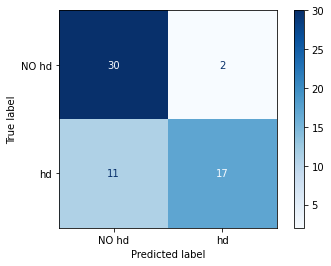

In [22]:
plot_confusion_matrix(model_KNN,X_test,y_test,display_labels=['NO hd','hd'],cmap='Blues')
plt.show()

In [23]:
# #prediction
# y_pred = model_DT.predict(X_test)
# accuracy_score(y_test, y_pred)

#### Calculate TN,FN,FP,TP

In [24]:
y_pred=model_KNN.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred)
print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[30  2]
 [11 17]]


In [25]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  30
False Negatives =  11
False Positives =  2
True Positives =  17


#### Accuracy Score

In [26]:
print("Calculated Manually __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\ncalculated using Scikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test,y_pred)

print('Accuracy: ', accuracy_)

Calculated Manually __________________________
Accuracy:  0.7833333333333333

calculated using Scikit-Learn ________________________
Accuracy:  0.7833333333333333


#### Train and test accuracy

In [27]:
print('\ntrain acc:',model_KNN.score(X_train,y_train))
print('\ntest acc:',model_KNN.score(X_test,y_test))


train acc: 0.8361344537815126

test acc: 0.7833333333333333


**Explanation:** Overfitting

#### Precision,f1_score,Recall

In [28]:
print("Calculated maunally __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\ncalculated using Scikit-Learn ________________________")
precision_ = np.round(precision_score(y_test,y_pred), 2)
recall_ = np.round(recall_score(y_test,y_pred), 2)
f1_score__ = np.round(f1_score(y_test,y_pred), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated maunally __________________________
Precision =  0.89
Recall =  0.61
f1 score =  0.72

calculated using Scikit-Learn ________________________
Precision =  0.89
Recall =  0.61
f1 score =  0.72


In [29]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.61
False Positive Rate =  0.06


#### ROC and AUC

#### Manually plot ROC, AUC

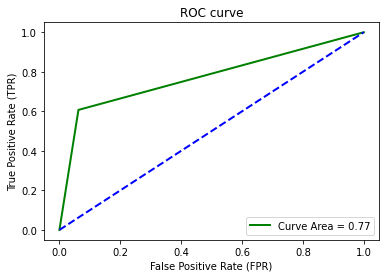

In [30]:
fpr, tpr, thr = roc_curve(y_test,y_pred)
auc = np.round(roc_auc_score(y_test,y_pred), 2)

#plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Short Method

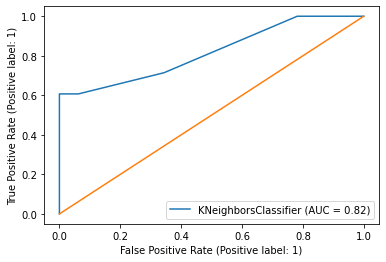

In [31]:
plot_roc_curve(model_KNN,X_test,y_test)
plt.plot([0,1],[0,1])

### Report

In [32]:
class_report = classification_report(y_test,y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        32
           1       0.89      0.61      0.72        28

    accuracy                           0.78        60
   macro avg       0.81      0.77      0.77        60
weighted avg       0.81      0.78      0.78        60



- 

### HyperParameter Tuning
- Grid Search and Cross validation

In [33]:
n_neighbors=np.random.randint(1,50,2)

parameters = {'n_neighbors': n_neighbors,  #parameter or grid
              'algorithm': ['auto', 'ball_tree','kd_tree']}

model_KNN_gscv = KNeighborsClassifier()

gscv = GridSearchCV(estimator=model_KNN_gscv,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5, # 5 fold corss validation
                           n_jobs=-1)

# fit the model with the best hyper-parameters
gscv = gscv.fit(X_train, y_train)
gscv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': array([43, 35])},
             scoring='accuracy')

#### Best Hyperparameter

In [34]:
gscv.best_params_

{'algorithm': 'auto', 'n_neighbors': 43}

In [35]:
# gscv.cv_results_

#Convert to dataframe and sort according to  rank test score
gscv.cv_results_ =pd.DataFrame(gscv.cv_results_)
gscv.cv_results_.sort_values('rank_test_score').head() #df.short_values('column')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006781,0.003478,0.061499,0.026538,auto,43,"{'algorithm': 'auto', 'n_neighbors': 43}",0.791667,0.791667,0.895833,0.808511,0.808511,0.819238,0.039032,1
1,0.004085,0.003341,0.010208,0.009853,auto,35,"{'algorithm': 'auto', 'n_neighbors': 35}",0.791667,0.791667,0.895833,0.808511,0.808511,0.819238,0.039032,1
2,0.009373,0.007653,0.006249,0.007653,ball_tree,43,"{'algorithm': 'ball_tree', 'n_neighbors': 43}",0.791667,0.791667,0.895833,0.808511,0.808511,0.819238,0.039032,1
3,0.009373,0.007653,0.009373,0.007653,ball_tree,35,"{'algorithm': 'ball_tree', 'n_neighbors': 35}",0.791667,0.791667,0.895833,0.808511,0.808511,0.819238,0.039032,1
4,0.009373,0.007653,0.009373,0.007653,kd_tree,43,"{'algorithm': 'kd_tree', 'n_neighbors': 43}",0.791667,0.791667,0.895833,0.808511,0.808511,0.819238,0.039032,1


### Model Performance Evaluation after Tuning

#### Confusion Matrix

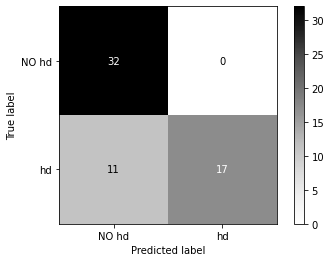

In [36]:
plot_confusion_matrix(gscv,X_test,y_test,display_labels=['NO hd','hd'],cmap='Greys')
plt.show()

In [37]:
y_pred_gs =gscv.predict(X_test) 

confusion_matrix_gs = confusion_matrix(y_test,y_pred_gs)

print('confusion_matrix_gs: \n', confusion_matrix_gs)

confusion_matrix_gs: 
 [[32  0]
 [11 17]]


In [38]:
TN = confusion_matrix_gs[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_gs[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_gs[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_gs[1,1]
print("True Positives = ", TP)

True Negatives =  32
False Negatives =  11
False Positives =  0
True Positives =  17


In [39]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.61
False Positive Rate =  0.0


#### ROC AUC

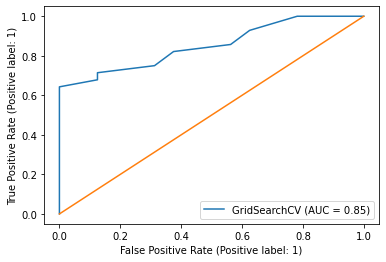

In [40]:
plot_roc_curve(gscv,X_test,y_test)
plt.plot([0,1],[0,1])

#### Report

In [41]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        32
           1       1.00      0.61      0.76        28

    accuracy                           0.82        60
   macro avg       0.87      0.80      0.80        60
weighted avg       0.86      0.82      0.81        60



In [42]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('\nAccuracy after tuning: ', accuracy_score(y_test, y_pred_gs))

Accuracy:  0.7833333333333333

Accuracy after tuning:  0.8166666666666667


#### Train and test accuracy

In [43]:
print('\ntrain acc:',gscv.score(X_train,y_train))
print('\ntest acc:',gscv.score(X_test,y_test))


train acc: 0.819327731092437

test acc: 0.8166666666666667


**Explanation:** no overfitting and under fitting 

**finish line